In [1]:
## From: https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

#import get to call a get request on the site
from requests import get

#get the first page of the housing prices
response = get('https://minneapolis.craigslist.org/search/apa?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print( len(posts)) #to double check I got 120 (elements/page)
post = posts[0]

<class 'bs4.element.ResultSet'>
120


In [2]:
curtime = post.find('time',class_='result-date')['datetime']
print(curtime)
cururl = post.find('a',class_='result-title hdrlnk')['href']
print(cururl)

2020-06-28 20:03
https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-large-charming-classic-2/7150215994.html


In [3]:
#curbrs = post.find('span', class_ = 'housing').text.split()[0][:-2]
#print(curbrs)

#cursqft = post.find('span', class_ = 'housing')
#if cursqft:
#    cursqft = cursqft.text.split()[2][:-3] #cleans the ft2 at the end
#    print(cursqft)
#print(cursqft)

curhood = post.find('span', class_='result-hood') 
if curhood:
    curhood = curhood.text
    print(curhood)



 (Minneapolis)


In [4]:
from geopy.geocoders import Nominatim, ArcGIS
curmap = BeautifulSoup(get(cururl).text,'html.parser').find_all('div',class_='mapbox')[0]
geolocator = Nominatim(user_agent="darren")

print(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])

location = geolocator.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])


geolocator2 = ArcGIS(user_agent="darren")
location2 = geolocator2.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'],
                                distance=500)





import numpy as np

loc = geolocator.reverse(query=str(np.round(float(curmap.find('div')['data-latitude'])-.001,3))
                   +","
                   +str(np.round(float(curmap.find('div')['data-longitude'])-.001,3)))
    
print(location.address)
print(location2.address)
print(loc.address)

#print(location.raw['address'])
#print(location.raw['address']['city'])
#print(location.raw['address']['neighbourhood'])
#print(location.raw['address']['postcode'])

44.945918,-93.289409
New Wine Church, Aldrich Avenue South, CARAG, Minneapolis, Hennepin County, Minnesota, 55419, United States of America
3162 Aldrich Ave S, Minneapolis, Minnesota 55408, USA
Bryant Ave. S, West 32nd Street, East Calhoun, Minneapolis, Hennepin County, Minnesota, 55408, United States of America


In [5]:
curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
print(curmap)

[<div class="mapbox">
<div class="viewposting" data-accuracy="10" data-latitude="44.945918" data-longitude="-93.289409" id="map"></div>
<div class="mapaddress">3129  Aldrich Avenue South near 32 nd</div>
<p class="mapaddress">
<small>
            (<a href="https://www.google.com/maps/search/44.945918,-93.289409" target="_blank">google map</a>)
        </small>
</p>
</div>]


In [6]:
#new code to put here:
#get list of neighborhoods
#for each neighborhood,
#  get central coordinate
#for each posting
#  calculate distance from neighborhoods' centers
#  assign neighborhood based on nearest neighbor

In [7]:
#linkpfx = 'https://minneapolis.craigslist.org/search/apa?'
#linksfx =( 'sort=date'
#          +'&hasPic=1'
#          +'&bundleDuplicates=1'
#          +'&search_distance=20'
#          +'&postal=55454'
#          +'&min_price=500'
#          +'&max_price=4000'
#          +'&max_bedrooms=3'
#          +'&availabilityMode=0'
#          +'&sale_date=all+dates')
#response = get(linkpfx+linksfx)
#html_soup = BeautifulSoup(response.text, 'html.parser')
#results_num = html_soup.find('div', class_= 'search-legend')
#results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
#pages = np.arange(0, results_total+1, 120)
#print(results_total)
#print(pages)

#post.find('a', class_='result-title hdrlnk')['href'] in post_links
#post.find('a', class_='result-title hdrlnk')['href'] in 
#apts['URL'].str.contains(post.find('a', class_='result-title hdrlnk')['href']).sum()
#apts['URL'].str.contains('https://minneapolis.craigslist.org/dak/apa/d/burnsville-end-unit-2-bedroom-townhouse/7135839874.html').sum()

In [8]:
#build out the loop
from bs4 import BeautifulSoup
from time import sleep, time
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from IPython.core.display import clear_output
import numpy as np


citystr = 'minneapolis' ## 'washingtondc' #'minneapolis'
linkpfx = 'https://'+citystr+'.craigslist.org/search/apa?'
linksfx =( 'sort=date'
          +'&hasPic=1'
          +'&bundleDuplicates=1'
          +'&search_distance=20'
          +'&postal=55454' #55454' #DC: 20009
          +'&min_price=300'
          +'&max_price=8000'
          +'&max_bedrooms=4'
          +'&availabilityMode=0'
          +'&sale_date=all+dates')
response = get(linkpfx+linksfx)
html_soup = BeautifulSoup(response.text, 'html.parser')
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
pages = np.arange(0, results_total+1, 120)


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="derinkuyu",timeout=5)

#
TypeDict = {
    'apartment': 1, 
    'condo':2, 
    'cottage/cabin':3, 
    'duplex':4, 
    'flat':5, 
    'house':6, 
    'in-law':7, 
    'loft':8, 
    'townhouse':9, 
    'manufactured':10, 
    'assisted living':11, 
    'land':12}
LaundryDict = {
    'w/d in unit':1,
    'w/d hookups':2,
    'laundry in bldg':3,
    'laundry on site':4,
    'no laundry on site':5
}    
ParkingDict = {
    'carport':1,
    'attached garage':2,
    'detached garage':3,
    'off-street parking':4,
    'street parking':5,
    'valet parking':6,
    'no parking':7
}

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []


cities = []
towns = []
neighborhoods = []
zips = []


types = []
laundries = []
parkings = []

for page in pages:
    
    #get request
    response = get(linkpfx
                   + 's=' #parameter for defining page number
                   + str(page) #page in above array
                   + linksfx)    
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:
        
        curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
        curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
        
        if (post.find('span', class_ = 'result-hood') is not None) and curmap and (
        post.find('a', class_='result-title hdrlnk')['href'] not in post_links):

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #
            #curpost = get(post_link).text
            curmap = curmap[0] #BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')[0]
            location = geolocator.reverse(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])
            
            try: 
                cities.append(location.raw['address']['city'])
            except:
                try: 
                    cities.append(location.raw['address']['town'])
                except:
                    cities.append('')
            
            try: 
                towns.append(location.raw['address']['town'])
            except:
                towns.append('')
            
            try:
                neighborhoods.append(location.raw['address']['neighbourhood'])
            except:
                try: 
                    locshift1 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])+.001)+","+str(float(curmap.find('div')['data-longitude'])+.001))
                    neighborhoods.append(locshift1.raw['address']['neighbourhood'])
                except:                   
                    try: 
                        locshift2 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])-.001)+","+str(float(curmap.find('div')['data-longitude'])-.001))
                        neighborhoods.append(locshift2.raw['address']['neighbourhood'])
                    except:
                        try:
                            neighborhoods.append(location.raw['address']['town'])
                        except:
                            try:
                                neighborhoods.append(location.raw['address']['city'])
                            except:
                                neighborhoods.append('')
            
            try:
                zips.append(location.raw['address']['postcode'])
            except:
                zips.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                typename = list(set(curattr.text.split('\n')).intersection(list(TypeDict.keys())))[0]
                types.append(TypeDict[typename])
            except:
                types.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                laundryname = list(set(curattr.text.split('\n')).intersection(list(LaundryDict.keys())))[0]
                laundries.append(LaundryDict[laundryname])
            except:
                laundries.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                parkname = list(set(curattr.text.split('\n')).intersection(list(ParkingDict.keys())))[0]
                parkings.append(ParkingDict[parkname])
            except:
                parkings.append('')
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

import pandas as pd

apts = pd.DataFrame({
    'posted': post_timing,
    'neighborhood': post_hoods,
    'post title': post_title_texts,
    'number bedrooms': bedroom_counts,
    'sqft': sqfts,
    'URL': post_links,
    'price': post_prices,
    'cities':cities,
    'towns':towns,
    'neighborhoods':neighborhoods,
    'zips': zips,
    'types':types,
    'parking':parkings,
    'laundry':laundries})
#print(apts.info())
#apts.head(30)
apts.shape

#drop duplicates
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])

#make the number bedrooms to a float (since np.nan is a float too)
apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

apts.to_csv(path_or_buf='./scraped_data/apts_'+citystr+"_"+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
apts.shape


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!


Scrape complete!


(97, 14)

In [9]:
##drop duplicates
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
#
##make the number bedrooms to a float (since np.nan is a float too)
#apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))
#
##convert datetime string into datetime object to be able to work with it
#from datetime import datetime
#
#apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

#apts.to_csv(path_or_buf='./apts_'+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
#apts.shape

In [16]:
import os
import glob
citystr = 'minneapolis' #'minneapolis', 'washingtondc'

aptfiles = glob.glob('./scraped_data/apts_'+citystr+'*')


try:
    del apts
except:
    print('no apts in memory, loading some...')


for file in aptfiles:
    try: 
        apts = apts.append(pd.read_csv(file),ignore_index=True)
    except:
        apts = pd.read_csv(file)
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
apts = apts[apts['sqft']<5000]

print(str(apts.shape[0])+' unique listings found.')

2194 unique listings found.


In [17]:
from operator import itemgetter
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
NaN = np.nan
if 'medianIncome' not in apts.columns:
    apts['medianIncome'] = NaN
    apts = pd.concat([apts,pd.DataFrame(columns=list(map(itemgetter('x'), zipDict['population_by_age'][2]['values'])))])

#print(apts.columns)

In [18]:

#index = 0
#apt = apts.iloc[index]
#zipcode = search.by_zipcode(str(apt['zips']))
#zipDict = zipcode.to_dict()
#income = np.float(zipDict['median_household_income'])
#popsByAge = np.array(list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] )) ) / zipDict['population']
#
#apts.loc[index,'medianIncome'] = income
#apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = popsByAge
#print(apts.iloc[0])
#
    

    
for index, apt in apts.iterrows():
    zipcode = search.by_zipcode(str(apt['zips']))
    zipDict = zipcode.to_dict()
    income = zipDict['median_household_income']
    if income is not None:
        apts.loc[index,'medianIncome'] = np.float(income)
        
    if zipDict['population_by_age'] is not None:
        popsByAge = list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] ))
        apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = np.array(popsByAge) / zipDict['population']
    

In [19]:
apts['pKids'] = apts[['Under 5', '5-9', '10-14']].sum(axis=1)
apts['pYouths'] = apts[['15-19']].sum(axis=1)
apts['pEarlyTwenties'] = apts[['20-24']].sum(axis=1)
apts['pLateTwenties'] = apts[['25-29']].sum(axis=1)
apts['pThirties'] = apts[['30-34','35-39']].sum(axis=1)
apts['pForties'] = apts[['40-44','45-49']].sum(axis=1)
apts['pFiftyPlus'] = apts[['50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 Plus']].sum(axis=1)
#print(apts['pFiftyPlus'])

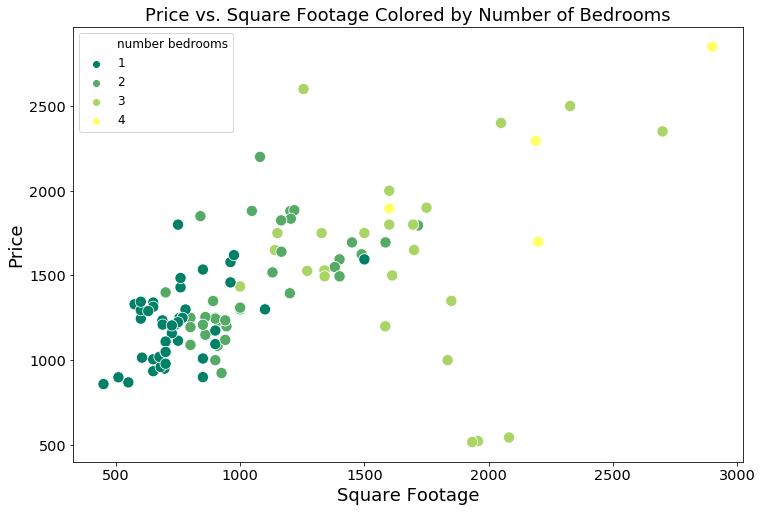

In [20]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft', y='price', hue='number bedrooms', palette='summer', x_jitter=True, y_jitter=True, s=125, data=apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=18)
plt.ylabel("Price", fontsize=18);
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18);


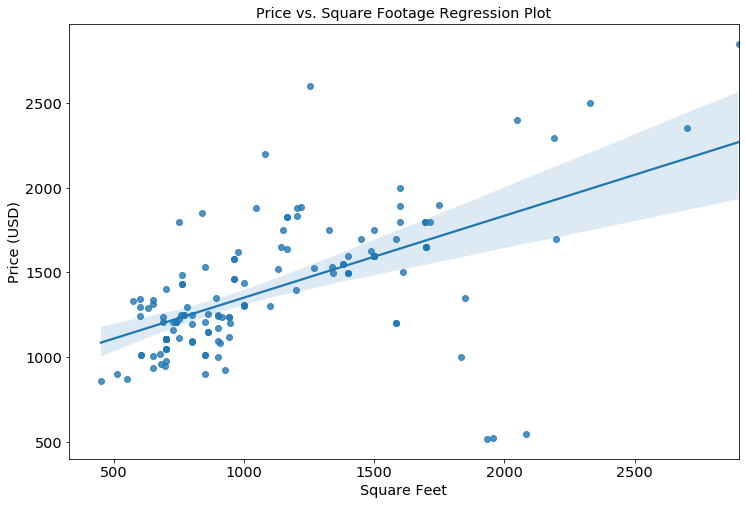

In [21]:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqft', y='price', data=apts.dropna());
plt.title('Price vs. Square Footage Regression Plot');
plt.xlabel("Square Feet");
plt.ylabel("Price (USD)");

In [22]:
apts.corr()

number bedrooms      sqft     price     types   parking  \
number bedrooms         1.000000  0.761128  0.349530  0.472598 -0.005878   
sqft                    0.761128  1.000000  0.507702  0.525993 -0.161401   
price                   0.349530  0.507702  1.000000  0.124191 -0.303164   
types                   0.472598  0.525993  0.124191  1.000000 -0.101484   
parking                -0.005878 -0.161401 -0.303164 -0.101484  1.000000   
laundry                -0.114484 -0.233709 -0.434835 -0.204578  0.570096   
medianIncome            0.046881  0.150692  0.065739  0.147420 -0.119597   
pKids                   0.114264  0.099590 -0.146436  0.150180  0.131057   
pYouths                 0.134117  0.057985 -0.097335  0.141287  0.120685   
pEarlyTwenties          0.008100 -0.058932  0.065293 -0.024432  0.047837   
pLateTwenties          -0.160189 -0.120875  0.190184 -0.155568 -0.090260   
pThirties              -0.096761 -0.049448  0.133098 -0.064403 -0.059667   
pForties                0.013407  0.065099  0.025506  0.083173 -0.035097   
pFiftyPlus             -0.021444  0.027396 -0.002725  0.013381 -0.060202   

                  laundry  medianIncome     pKids   pYouths  pEarlyTwenties  \
number bedrooms -0.114484      0.046881  0.114264  0.134117        0.008100   
sqft            -0.233709      0.150692  0.099590  0.057985       -0.058932   
price           -0.434835      0.065739 -0.146436 -0.097335        0.065293   
types           -0.204578      0.147420  0.150180  0.141287       -0.024432   
parking          0.570096     -0.119597  0.131057  0.120685        0.047837   
laundry          1.000000     -0.111551  0.102228  0.032127       -0.091538   
medianIncome    -0.111551      1.000000  0.306739 -0.019242       -0.565823   
pKids            0.102228      0.306739  1.000000  0.461858       -0.034779   
pYouths          0.032127     -0.019242  0.461858  1.000000        0.633850   
pEarlyTwenties  -0.091538     -0.565823 -0.034779  0.633850        1.000000   
pLateTwenties   -0.155628     -0.421505  0.032202 -0.069387        0.471034   
pThirties       -0.131513     -0.149121  0.414109  0.054847        0.293529   
pForties        -0.070795      0.746212  0.789744  0.322924        0.047415   
pFiftyPlus      -0.015330      0.379515  0.614551  0.254705       -0.001885   

                 pLateTwenties  pThirties  pForties  pFiftyPlus  
number bedrooms      -0.160189  -0.096761  0.013407   -0.021444  
sqft                 -0.120875  -0.049448  0.065099    0.027396  
price                 0.190184   0.133098  0.025506   -0.002725  
types                -0.155568  -0.064403  0.083173    0.013381  
parking              -0.090260  -0.059667 -0.035097   -0.060202  
laundry              -0.155628  -0.131513 -0.070795   -0.015330  
medianIncome         -0.421505  -0.149121  0.746212    0.379515  
pKids                 0.032202   0.414109  0.789744    0.614551  
pYouths              -0.069387   0.054847  0.322924    0.254705  
pEarlyTwenties        0.471034   0.293529  0.047415   -0.001885  
pLateTwenties         1.000000   0.875979  0.381578    0.261843  
pThirties             0.875979   1.000000  0.719666    0.530427  
pForties              0.381578   0.719666  1.000000    0.815948  
pFiftyPlus            0.261843   0.530427  0.815948    1.000000

In [23]:
apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()

number bedrooms    sqft   price  types  parking  laundry  \
neighborhoods                                                             
Apple Valley               1.0   857.0  1263.0    1.0      2.0      1.0   
Aquila                     1.0   750.0  1000.0    1.0      3.0      3.0   
Audubon Park               1.0   800.0   890.0    2.0      2.0      3.0   
Avenida                    1.0  1342.0  1772.5    9.0      2.0      1.0   
Bancroft                   1.0   536.0   940.0    1.0      4.0      3.0   
...                        ...     ...     ...    ...      ...      ...   
Whittier                   1.0   560.0  1025.0    1.0      4.0      3.0   
Willow Park                1.0   724.0  1515.0    1.0      2.0      1.0   
Windom                     1.0   650.0   925.0    1.0      3.0      3.0   
Windom Park                1.0  1000.0  1200.0    NaN      NaN      NaN   
Woodbury                   1.0   755.0  1344.0    1.0      2.0      1.0   

               medianIncome     pKids   pYouths  pEarlyTwenties  \
neighborhoods                                                     
Apple Valley        85602.0  0.247545  0.074100        0.047108   
Aquila              63699.0  0.159190  0.042854        0.067027   
Audubon Park        55486.0  0.172401  0.047740        0.063179   
Avenida            102759.0  0.243626  0.077844        0.034343   
Bancroft            47433.0  0.227317  0.058446        0.076371   
...                     ...       ...       ...             ...   
Whittier            48913.0  0.158134  0.041269        0.107066   
Willow Park         63699.0  0.159190  0.042854        0.067027   
Windom                  NaN  0.000000  0.000000        0.000000   
Windom Park         55486.0  0.172401  0.047740        0.063179   
Woodbury            91591.0  0.228345  0.070331        0.047365   

               pLateTwenties  pThirties  pForties  pFiftyPlus  
neighborhoods                                                  
Apple Valley        0.058312   0.150709  0.174973    0.247254  
Aquila              0.124634   0.157827  0.128322    0.320144  
Audubon Park        0.097414   0.179391  0.140506    0.299369  
Avenida             0.048704   0.114736  0.203559    0.277188  
Bancroft            0.112299   0.194451  0.130171    0.200945  
...                      ...        ...       ...         ...  
Whittier            0.165920   0.173902  0.130945    0.222763  
Willow Park         0.124634   0.157827  0.128322    0.320144  
Windom              0.000000   0.000000  0.000000    0.000000  
Windom Park         0.097414   0.179391  0.140506    0.299369  
Woodbury            0.066681   0.130681  0.170999    0.285599  

[101 rows x 14 columns]

In [24]:
apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()['price'].sort_values()

neighborhoods
McKinley            600.0
Wenonah             725.0
Logan Park          750.0
Powderhorn Park     760.0
Victory             775.0
                    ...  
Bottineau          1647.5
Sheridan           1672.5
Blackstone         1693.0
Avenida            1772.5
Northeast Park     1800.0
Name: price, Length: 101, dtype: float64

In [25]:
brlim = 1
sns.boxplot(x='neighborhoods', y='price', data=apts[apts['number bedrooms']<=brlim],
           order=sorted(apts[apts['number bedrooms']<=brlim]['neighborhoods'].unique()))
plt.xlabel("Neighborhood");
plt.xticks(rotation=90,size=10)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood - Boxplots ("+str(brlim)+" or fewer bedrooms)");

TypeError: '<' not supported between instances of 'float' and 'str'

In [26]:
# drop problematic cols
apts = apts.dropna(subset=['price','number bedrooms','sqft','neighborhoods','types','laundry','parking',
                           'medianIncome','pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties',
                           'pForties','pFiftyPlus'])
print(apts.shape)

# recode neighborhoods
apts_onehot = apts.copy()
apts_onehot = pd.get_dummies(apts_onehot, columns=['cities'], prefix = ['ct'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['neighborhoods'], prefix = ['nb'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['types'], prefix = ['ty'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['laundry'], prefix = ['ld'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['parking'], prefix = ['pk'])

#print(apts_onehot)

(1655, 40)


In [27]:
from sklearn import preprocessing
from sklearn import linear_model

maincols = ['number bedrooms','sqft','medianIncome',
            'pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties','pForties','pFiftyPlus']
#nbcols = [col for col in apts_onehot if col.startswith('ct')]
#for c in nbcols:
#    maincols.append(c) 
nbcols = [col for col in apts_onehot if col.startswith('nb')]
for c in nbcols:
    maincols.append(c) 
tycols = [col for col in apts_onehot if col.startswith('ty')]
for c in tycols:
    maincols.append(c) 
pkcols = [col for col in apts_onehot if col.startswith('pk')]
for c in pkcols:
    maincols.append(c) 
ldcols = [col for col in apts_onehot if col.startswith('ld')]
for c in ldcols:
    maincols.append(c) 

# set up regression
y = apts_onehot['price'].values.reshape(-1,1)
X = apts_onehot[maincols].values
thresh = .5 # drop columns that correlate above this value
cor = np.abs(np.corrcoef(X.T))
p = np.argwhere(np.triu(np.isclose(cor,1),1))
X = np.delete(X,p[:,1],axis=1)
X = preprocessing.scale(X)

#OLS
reg = linear_model.LinearRegression()
reg.fit(y=y,X=X)
apts_onehot['price_est'] = np.zeros((apts_onehot.shape[0],1))
apts_onehot['price_est'] = reg.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100

# Ridge regression approach
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [.005, .01, .025, .05, .10, .5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X=X,y=y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
apts_onehot['price_est'] = ridge_regressor.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100


{'alpha': 256}
-138504.1519527602


In [28]:
X.shape

(1655, 175)

In [29]:
apts_onehot['price_difpct']

0      -12.614286
1       -4.872742
2        5.048190
3        6.561086
4        2.609046
          ...    
3343   -20.672243
3344    -1.670162
3347    -4.575082
3348    17.680108
3349    -6.666897
Name: price_difpct, Length: 1655, dtype: float64

In [30]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 600

apts_onehot[(apts_onehot['price_difpct']<=10) & 
            (apts_onehot['sqft']>=699) & 
            (apts_onehot['price']<=1200) & 
            (apts_onehot['number bedrooms']<=2)].sort_values('price_difpct',ascending=True)[['URL','price_difpct']] 

URL  \
2308   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-beautiful-remodeled-one-bed/7143833879.html   
1314                     https://minneapolis.craigslist.org/wsh/apa/d/saint-paul-sweet-home/7137776465.html   
1469           https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-one-bedroom-and-one/7122664994.html   
1463    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-located-right-in-the-heart/7128904675.html   
1515             https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-5049-washburn-ave/7121708424.html   
1232        https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-umn-student-housing-in/7137535002.html   
806      https://minneapolis.craigslist.org/ram/apa/d/saint-paul-2-bedroom-1300-july-august/7136430780.html   
2157       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-800-2br-ft2-you-can-rent/7142586547.html   
1305        https://minneapolis.craigslist.org/ram/apa/d/saint-paul-1bedroom-house-for-rent/7137753100.html   
1455         https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-beautifully-updated-1/7133294599.html   
1161             https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-4241-humboldt-ave/7125000707.html   
1758    https://minneapolis.craigslist.org/ram/apa/d/saint-paul-second-floor-unit-available/7139766987.html   
2189      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-great-location-ne-mpls-2/7143279835.html   
1288      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-one-bedroom-apartment-in/7137799899.html   
2978      https://minneapolis.craigslist.org/ram/apa/d/saint-paul-condo-beautiful-2-br-unit/7148796710.html   
2323      https://minneapolis.craigslist.org/ram/apa/d/saint-paul-condo-beautiful-2-br-unit/7143809699.html   
748        https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-charming-condo-just-few/7136457444.html   
257    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-updated-1-bedroom-available/7132315157.html   
887       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-large-unfinished-basement/7130874044.html   
3159     https://minneapolis.craigslist.org/ram/apa/d/saint-paul-open-house-tuesday-pm-cute/7149905562.html   
3162     https://minneapolis.craigslist.org/ram/apa/d/saint-paul-open-house-tuesday-pm-cute/7149905159.html   
3044     https://minneapolis.craigslist.org/ram/apa/d/saint-paul-lovely-2-bedroom-apartment/7143032462.html   
1612        https://minneapolis.craigslist.org/hnp/apa/d/hopkins-large-and-spacious-1-br-in/7135020461.html   
2038   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-garden-level-on-grand-avenue/7135757026.html   
2186       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-remodeled-downtown-saint/7143283490.html   
2560  https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-cozy-new-hope-2-br-apartment/7145467476.html   
559            https://minneapolis.craigslist.org/ram/apa/d/minneapolis-independent-55-1-br/7136242496.html   
226      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-spacious-1-br-with-ton-of/7134508421.html   
1155    https://minneapolis.craigslist.org/ank/apa/d/2br-dishwasher-huge-closets-affordable/7135307977.html   
302    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-move-in-special-loring-park/7131316388.html   
3050       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-small-2-bedroom-on-green/7148961541.html   
8       https://minneapolis.craigslist.org/ank/apa/d/minneapolis-dont-miss-out-on-amazing-1/7135834389.html   
2113   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-just-south-of-downtown-mpls/7142687277.html   
2346    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-2-bedroom-15-bathroom-with/7143993031.html   
1894     https://minneapolis.craigslist.org/ram/apa/d/saint-paul-lovely-2-bedroom-apartment/7138219325.html   
2086   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-amazing-st-paul-location-off/7133909282.html 

In [31]:
#Prepare data:
prices = np.array(apts_onehot['price'])
features = np.array(apts_onehot[maincols])
feature_list = list(apts_onehot[maincols])

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, prices, test_size = 0.20, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1324, 175)
Training Labels Shape: (1324,)
Testing Features Shape: (331, 175)
Testing Labels Shape: (331,)


In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [34]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: $', round(np.mean(errors), 2), '.')

Mean Absolute Error: $ 137.78 .


In [35]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.5 %.


In [36]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


In [37]:
from IPython.display import Image 
Image("tree.png")

In [38]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqft                 Importance: 0.47
Variable: ld_1.0               Importance: 0.09
Variable: pThirties            Importance: 0.06
Variable: pYouths              Importance: 0.05
Variable: ty_2.0               Importance: 0.05
Variable: number bedrooms      Importance: 0.04
Variable: pKids                Importance: 0.04
Variable: pLateTwenties        Importance: 0.02
Variable: nb_West Calhoun      Importance: 0.02
Variable: medianIncome         Importance: 0.01
Variable: pEarlyTwenties       Importance: 0.01
Variable: pForties             Importance: 0.01
Variable: pFiftyPlus           Importance: 0.01
Variable: nb_Cedar-Isles-Dean  Importance: 0.01
Variable: nb_East Calhoun      Importance: 0.01
Variable: nb_Fern Hill         Importance: 0.01
Variable: nb_Powderhorn Park   Importance: 0.01
Variable: ty_1.0               Importance: 0.01
Variable: ty_6.0               Importance: 0.01
Variable: pk_1.0               Importance: 0.01
Variable: pk_2.0               Importanc

In [44]:
apts_onehot['price_est_rf'] = rf.predict(features)
apts_onehot['price_dif_rf'] = apts_onehot['price']-apts_onehot['price_est_rf']
apts_onehot['price_difpct_rf'] = (apts_onehot['price_dif_rf'] / apts_onehot['price_est_rf']) * 100

apts_onehot[(apts_onehot['price_difpct_rf']<=10) & 
            (apts_onehot['sqft']>=599) & 
            (apts_onehot['price']<=1200) & 
            (apts_onehot['number bedrooms']<=2)].sort_values('price_difpct_rf',ascending=True)[['URL','price_difpct','price_difpct_rf']] 

URL  \
2308   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-beautiful-remodeled-one-bed/7143833879.html   
2304        https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-renovated-2-bed-1-bath/7143804858.html   
1161             https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-4241-humboldt-ave/7125000707.html   
887       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-large-unfinished-basement/7130874044.html   
1515             https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-5049-washburn-ave/7121708424.html   
1274          https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-1-off-street-parking/7133819016.html   
1186     https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-condo-by-centennial-lakes/7137627466.html   
806      https://minneapolis.craigslist.org/ram/apa/d/saint-paul-2-bedroom-1300-july-august/7136430780.html   
1929   https://minneapolis.craigslist.org/dak/apa/d/saint-paul-elegant-1-bedroom-15-bath-in/7141355404.html   
2189      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-great-location-ne-mpls-2/7143279835.html   
1469           https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-one-bedroom-and-one/7122664994.html   
1305        https://minneapolis.craigslist.org/ram/apa/d/saint-paul-1bedroom-house-for-rent/7137753100.html   
1314                     https://minneapolis.craigslist.org/wsh/apa/d/saint-paul-sweet-home/7137776465.html   
3155     https://minneapolis.craigslist.org/ank/apa/d/minneapolis-beautiful-2-bedroom-house/7149903761.html   
1603    https://minneapolis.craigslist.org/ram/apa/d/saint-paul-cute-1-bedroom-with-natural/7138760616.html   
1462     https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-update-apartment-for-rent/7135540526.html   
1463    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-located-right-in-the-heart/7128904675.html   
45           https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-62-senior-independent/7135805238.html   
1743     https://minneapolis.craigslist.org/dak/apa/d/minneapolis-one-bedroom-apartment-for/7127324683.html   
2089         https://minneapolis.craigslist.org/ram/apa/d/beautiful-1-bedroom-on-green-line/7142169398.html   
859            https://minneapolis.craigslist.org/ram/apa/d/saint-paul-lease-today-new-dark/7137133551.html   
2021   https://minneapolis.craigslist.org/dak/apa/d/south-saint-paul-top-floor-unit-balcony/7142183645.html   
2157       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-800-2br-ft2-you-can-rent/7142586547.html   
2042   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-main-floor-corner-unit-for-8/7140742295.html   
2434    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-fall-rental-large-unit-525/7145231206.html   
257    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-updated-1-bedroom-available/7132315157.html   
2038   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-garden-level-on-grand-avenue/7135757026.html   
327           https://minneapolis.craigslist.org/hnp/apa/d/saint-paul-sunny-1br-corner-unit/7131033933.html   
2244      https://minneapolis.craigslist.org/dak/apa/d/saint-paul-1-2-bedrooms-pet-friendly/7128915057.html   
2243     https://minneapolis.craigslist.org/dak/apa/d/saint-paul-your-one-stop-shop-for-all/7143175119.html   
2606   https://minneapolis.craigslist.org/dak/apa/d/burnsville-you-havent-seen-beauty-until/7141622306.html   
3347   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-convenient-to-park-nicollet/7150068571.html   
2841           https://minneapolis.craigslist.org/hnp/apa/d/special-walk-to-shopping-dining/7148163851.html   
2677           https://minneapolis.craigslist.org/hnp/apa/d/special-walk-to-shopping-dining/7146684674.html   
302    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-move-in-special-loring-park/7131316388.html   
1672   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-location-clean-1-bedroom-on/7134913478.html 